# Визуализация.

Датасет представляет собой коллекцию медицинских и демографических данных пациентов, а также их статус диабета (положительный или отрицательный). Данные включают такие характеристики, как возраст, пол, индекс массы тела (ИМТ), гипертония, сердечно-сосудистые заболевания, история курения, уровень HbA1c и уровень глюкозы в крови. 

В будущем этот датасет может быть использован для построения моделей машинного обучения для прогнозирования диабета у пациентов на основе их истории болезни и демографической информации. Это может быть полезно для медицинских работников при выявлении пациентов, которые могут быть подвержены риску развития диабета, и при разработке персонализированных планов лечения.

Описание столбцов:

|Название| Описание |
|--|--|
|`gender`| Пол пациента |
|`age`| Возраст |
|`hypertension`| Гипертония —  это состояние, при котором кровяное давление в артериях постоянно повышено. Он принимает значения 0 или 1, где 0 означает отсутствие гипертонии, а 1 —  наличие гипертонии. |
|`heart_disease`| Болезни сердца —  это еще одно состояние, которое связано с повышенным риском развития диабета. Он также принимает значения 0 или 1, где 0 означает отсутствие сердечных заболеваний, а 1 —  наличие сердечных заболеваний. |
|`smoking_history`| Опыт курения —  также считается фактором риска развития диабета и может усугубить осложнения, связанные с диабетом. | 
|`bmi`| Это показатель количества жира в организме, основанный на весе и росте. Более высокие значения ИМТ связаны с повышенным риском развития диабета. Диапазон ИМТ в наборе данных составляет от 10,16 до 71,55. ИМТ менее 18,5 —  это недостаточный вес, 18,5-24,9 —  нормальный, 25-29,9 —  избыточный вес, а 30 и более —  ожирение. |
|`HbA1c_level`| Уровень HbA1c (гемоглобин A1c) —  это показатель среднего уровня сахара в крови человека за последние 2-3 месяца. Более высокий уровень указывает на больший риск развития диабета. В основном более 6,5% уровня HbA1c указывает на диабет. | 
|`blood_glucose_level`| Уровень глюкозы в крови —  это количество глюкозы в крови в определенный момент времени. Высокий уровень глюкозы в крови является основным признаком диабета. |
|`diabetes`| Диабет является целевой переменной (таргетом), при этом значение 1 указывает на наличие диабета, а 0 —  на его отсутствие. |

## Задание

Проведите визуализацию данных и попробуйте выяснить причины, от чего и с чем связаны основные причины наличия диабета у людей.

Ваша цель —  визуально с помощью графиков определить и доказать, что при наличии какого-либо фактора возможен риск развития диабета.

Этапы выполнения задания (наш pipeline):

1. Загрузка и предобработка данных (при необходимости)
2. Описательный анализ данных, просмотр данных
3. Построение гистограмм числовых переменных
4. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
5. Построение столбчатых диаграмм для категориальных переменных
6. Построение матрицы корреляции признаков (Phik или Пирсона)
7. Сравнение двух выборок
8. Общий вывод

## Загрузка данных

In [1]:
### импортируйте нужные библиотеки 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
# Предварительный просмотр
df.sample(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
23131,Female,70.0,0,0,No Info,27.32,3.5,200,0
4331,Female,37.0,0,0,No Info,24.05,5.8,155,0
34899,Male,70.0,0,0,not current,29.71,4.0,80,0
43356,Female,46.0,0,0,No Info,27.32,6.2,80,0
84871,Female,35.0,0,0,never,27.02,4.0,200,0
37075,Female,7.0,0,0,No Info,25.15,5.7,145,0
27488,Male,80.0,1,0,ever,22.66,4.5,158,0
69517,Female,51.0,0,0,never,27.32,3.5,80,0
64354,Female,3.0,0,0,No Info,16.01,5.7,85,0
56597,Female,22.0,0,0,never,26.20,6.6,130,0


In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


None

Вывод: 

1. Таблица состоит из 100 000 записей;
2. Все столбцы имеют ожидаемый тип данных;
3. Пропусков в таблице нет, данные готовы для обработки.

## Описательный анализ данных

Рассмотрите данные —  изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [4]:
# ваш код здесь
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
mask = df['HbA1c_level'] >= 6.5
print(df[mask].shape)
100*df[mask].shape[0]/df.shape[0]
30/1.7**2

(20797, 9)


10.380622837370243

**Вывод:**
Напишем вывод по колонкам. в предложенном датасете:

1. Средний возраст людей составляет 41,9 года, медианный возраст 43 года, возраст со среднеквадратичным отклонением: 41,9 +- 22,5 года. Медианнный возраст больше среднего, что означает, что в данных есть сдвиг в сторону ,большего возраста относительно среднего. Максимальный возраст 80 лет, минимальный возраст 1 месяц.

2. У 7,5% людей есть гипертония. Это видно из колонки mean, поскольку 1 отвечает за наличие гипертонии, а 0 за отсутствие.

3. У 4% людей есть сердечные заболевания. Средний индекс массы тела равен 27,3, как и медианный. Средний ИМТ с учётом среднеквадратичного отклонения:\
27,3 +- 6,6\
Минимальный ИМТ равен 10, максимальный ИМТ равен 95. Данные значения являются экстремальными, однако не являются невозможными. Например, данные Википедии
https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D0%B0%D0%BC%D1%8B%D1%85_%D1%82%D1%8F%D0%B6%D1%91%D0%BB%D1%8B%D1%85_%D0%BB%D1%8E%D0%B4%D0%B5%D0%B9_%D0%B2_%D0%BC%D0%B8%D1%80%D0%B5

показывают, что ИМТ человека может превышать 200. ИМТ < 16 считается выраженным дефицитом массы тела, значение 10 не выглядит невозможным, например, для людей с анорексией или похожими заболеавниями. Таковым, например, может быть человек с ростом 170 см и весом в 30 кг.

4. Уровень гемоглобина А1с:\
5,5 +- 1\
медианное значение равно 5,8, данные смещены в меньшую сторону от центра. 20,8% людей имеют этот показатель на уровне >= 6,5, что может указывать на наличие диабета.

5. Уровень глюкозы в крови:\
138,1 +- 40,7;\
медианное значение 140.

6. Диабет диагностирован у 8,5 процентов людей.

Очевидных выбросов в датасете нет.

## Предобработка данных

### Дубликаты

Предобработайте датасет —  проверьте на наличие дубликатов и удалите, если они есть.

In [6]:
# ваш код здесь
print(df.duplicated().sum())
df = df.drop_duplicates()
df.shape

3854


(96146, 9)

### Отсутствующие значения

Предобработайте датасет — проверьте на наличие NaN и удалите или заполните значения.

In [7]:
df.info()
df.isna().sum() 

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Все объекты non-null. Есть 2 столбца с типом object, проверим какие значения они принимают, поскольку, например, в smoking_history может быть запись типа 'no data'.

Мы видим, что в колонке пол 3 значения:
Male, Female, Other
Вопросы вызывает колонка 'Other', таких записей всего 18, т. е. 0,02%, их можно безболезненно удалить

В колонке smoking_history есть значение 'No info', таких записей 34,2% их нельзя удалять. видимо эффективнее всего при анализе данных смотреть на корреляции с курением отдельно для людей, чей статус по курению известен.


In [8]:
object_columns = df.select_dtypes(include='object')
for column in object_columns.columns:
    print(df[column].unique())
object_columns.columns

for column in object_columns.columns:
    for value in df[column].unique():
        print(f'Значение {value} встречается {df[df[column] == value].shape[0]}')
    print('\n')

print(18/df.shape[0]*100)
32887/df.shape[0]*100

['Female' 'Male' 'Other']
['never' 'No Info' 'current' 'former' 'ever' 'not current']
Значение Female встречается 56161
Значение Male встречается 39967
Значение Other встречается 18


Значение never встречается 34398
Значение No Info встречается 32887
Значение current встречается 9197
Значение former встречается 9299
Значение ever встречается 3998
Значение not current встречается 6367


0.018721527676658415


34.205271150125846

In [9]:
print(df.shape[0])
df.drop(df[df['gender'] == 'Other'].index, inplace=True)
df.shape[0]

96146


96128

### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа — на `int` или `float`
- Если категории — можно оставить `object`

**Вывод:**

Все данные имеют нужный тип.

## Визуализация

Построим графики:

1. Построение гистограмм числовых переменных
2. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
3. Построение столбчатых диаграмм для категориальных переменных
4. Построение матрицы корреляции признаков (Phik или Пирсона)

После построения опишите выборку. Что она из себя представляет? Есть ли зависимости?

In [10]:
a = df['age'].value_counts()
display(a)
a.iloc[0]/df.shape[0]

age
80.00    4932
51.00    1566
47.00    1509
48.00    1508
53.00    1497
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: count, Length: 102, dtype: int64

0.05130659121171771

In [11]:
a = df['bmi'].value_counts()
display(a)
print(a.iloc[0]/df.shape[0])
print(a.iloc[1]/df.shape[0])
a.iloc[2]/df.shape[0]

bmi
27.32    21659
23.00      103
27.12      101
24.96      100
27.80      100
         ...  
53.28        1
55.38        1
40.26        1
51.75        1
60.52        1
Name: count, Length: 4247, dtype: int64

0.22531416444740346
0.0010714880159786951


0.0010506824234354194

In [12]:
a = df['HbA1c_level'].value_counts()
display(a)
a.iloc[0]/df.shape[0]
display(100*a/a.sum())
a.iloc[:12].sum()/df.shape[0]

HbA1c_level
6.6    8161
5.7    8123
6.5    8051
5.8    7992
6.0    7987
6.2    7956
6.1    7712
3.5    7316
4.8    7296
4.5    7289
4.0    7204
5.0    7153
8.8     660
8.2     659
9.0     652
7.5     642
6.8     642
7.0     633
Name: count, dtype: int64

HbA1c_level
6.6    8.489722
5.7    8.450191
6.5    8.375291
5.8    8.313915
6.0    8.308713
6.2    8.276465
6.1    8.022636
3.5    7.610686
4.8    7.589880
4.5    7.582598
4.0    7.494174
5.0    7.441120
8.8    0.686585
8.2    0.685544
9.0    0.678262
7.5    0.667860
6.8    0.667860
7.0    0.658497
Name: count, dtype: float64

0.9595539280958721

In [13]:
a = df['blood_glucose_level'].value_counts()
display(a)
a.iloc[0]/df.shape[0]
display(100*a/a.sum())
a.iloc[:13].sum()/df.shape[0]

blood_glucose_level
159    7475
130    7471
126    7419
140    7414
160    7393
145    7371
200    7289
155    7285
90     6820
80     6785
100    6774
158    6737
85     6631
280     724
300     673
260     634
240     633
220     600
Name: count, dtype: int64

blood_glucose_level
159    7.776090
130    7.771929
126    7.717835
140    7.712633
160    7.690787
145    7.667901
200    7.582598
155    7.578437
90     7.094707
80     7.058297
100    7.046854
158    7.008364
85     6.898094
280    0.753162
300    0.700108
260    0.659537
240    0.658497
220    0.624168
Name: count, dtype: float64

0.9660452729693741

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>],
       [<Axes: title={'center': 'diabetes'}>, <Axes: >, <Axes: >]],
      dtype=object)

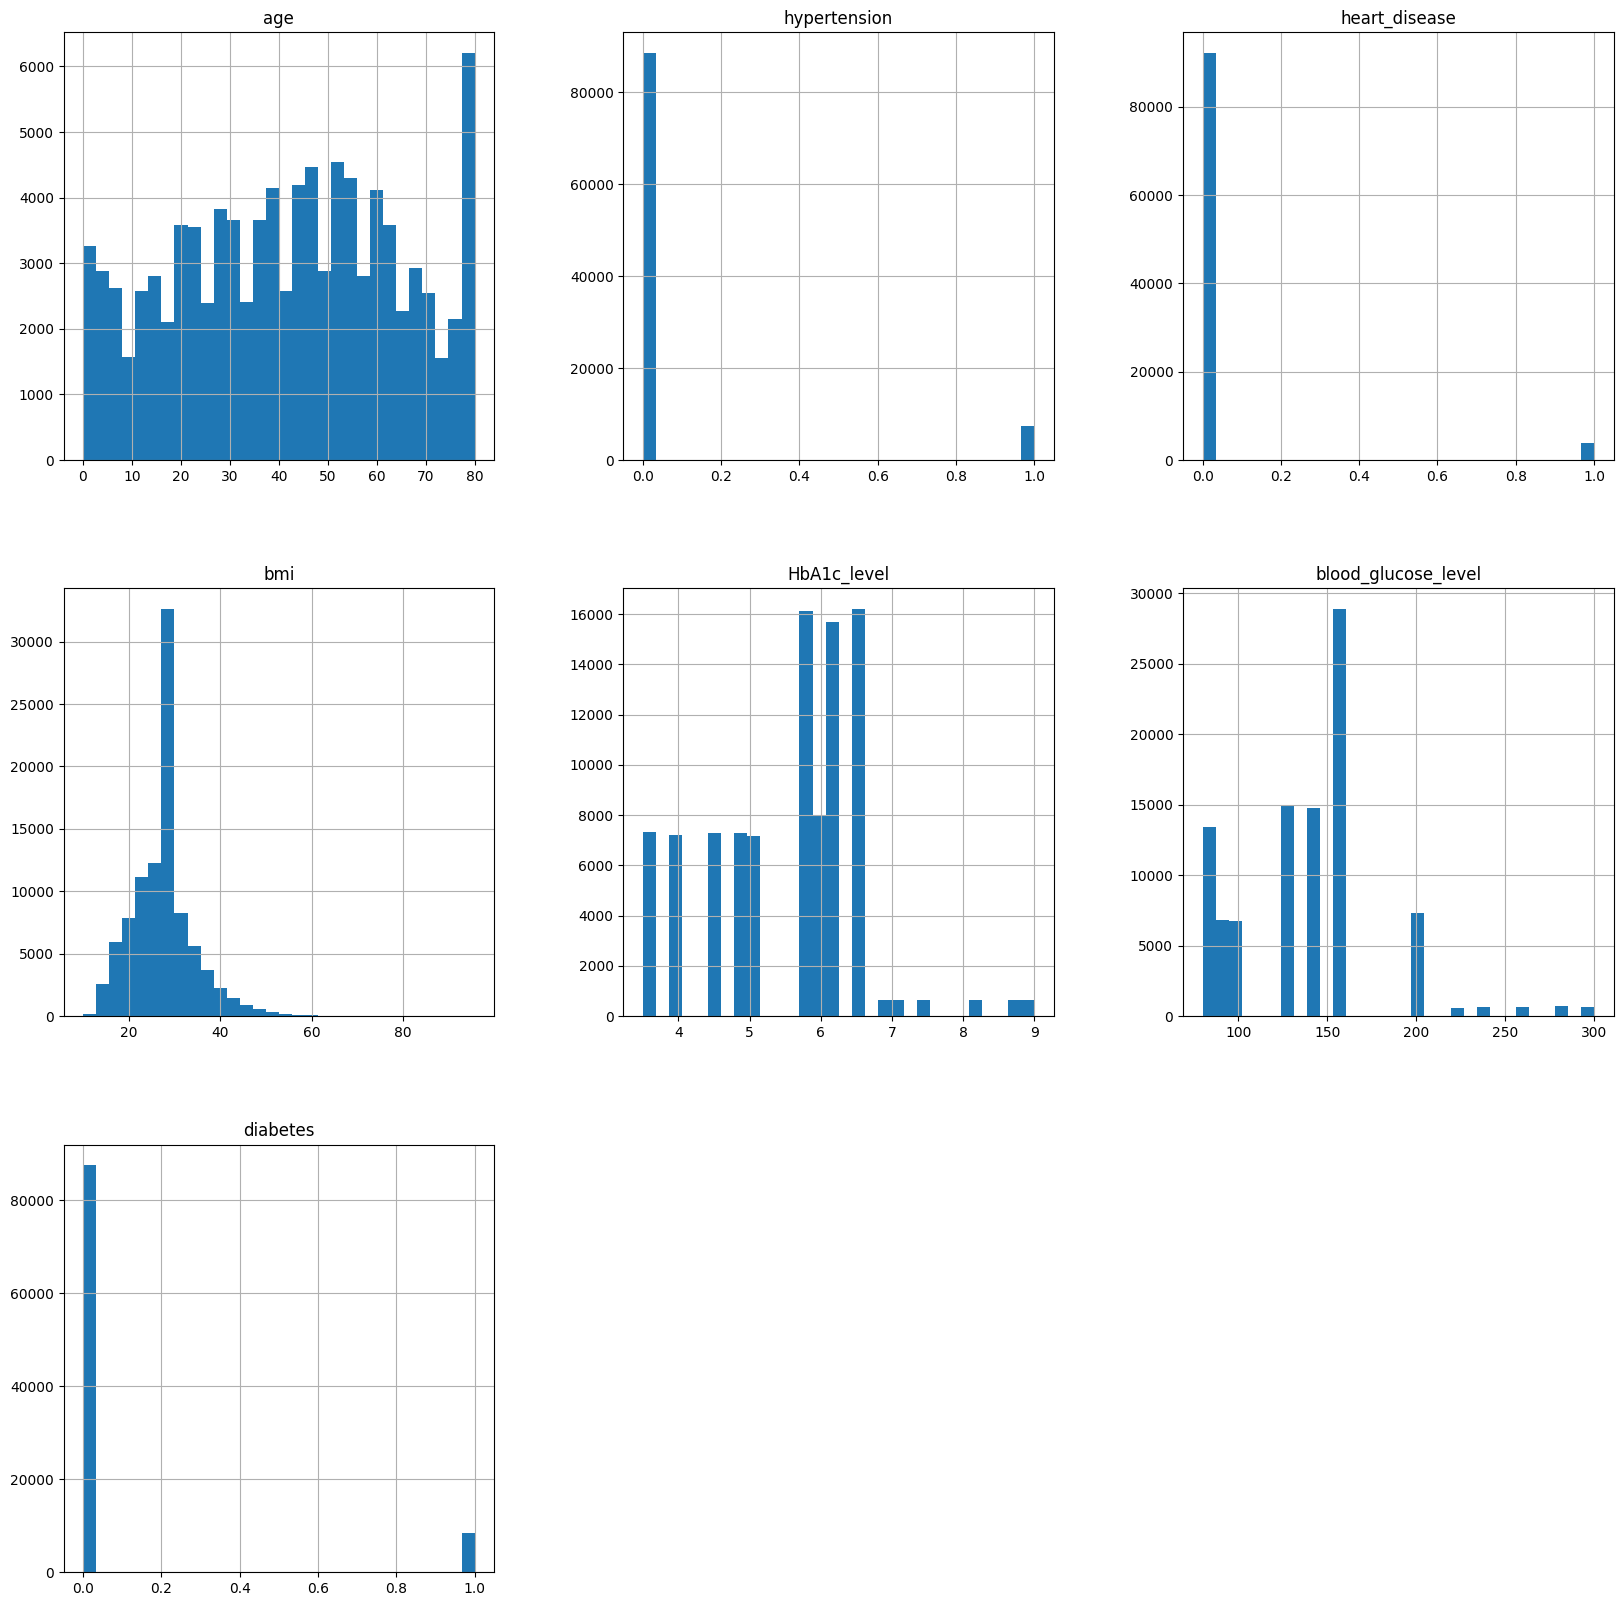

In [14]:
#построение гистограмм
df.hist(figsize=(20, 20), bins = 30)


**Вывод:**

Существенные выводы таковы:

1. В выборке очень много людей с возрастом, равным максимальному (80 лет). Таких ~5%, это ощутимое смещение данных в крайнее значение.
2. По наличию гипертонии, заболеваний сердца и диабета визуализация не даёт новых данных.
3. 22,5% людей имеет ИМТ равный 27,32, это значение резко выделяется среди других (следующие по популярности составляют 0,1% от всего датасета).
4. По уровню A1c гемоглобина также наблюдаются несколько резко выделяющихся по популярности значений:\
\
(как тут делать таблицы?)\
Значение    %\
6.6    8.489722\
5.7    8.450191\
6.5    8.375291
5.8    8.313915
6.0    8.308713\
6.2    8.276465\
6.1    8.022636\
3.5    7.610686\
4.8    7.589880\
4.5    7.582598\
4.0    7.494174\
5.0    7.441120

12 значений составляют от 7,5 до 8,5% каждое, остальные составляют менее 0,7%. В сумме эти популярные значения составляют 96,0% от всего датасета.
Из-за этого данные по этому признаку расположены очень несимметрично (это было видно и по медиане).

5. Уровень глюкозы в крови так же смещён в меньшую сторону, есть резко выделяющиеся популярные значения:\
\
Значение    %
159    7.776090\
130    7.771929\
126    7.717835\
140    7.712633\
160    7.690787\
145    7.667901\
200    7.582598\
155    7.578437\
90     7.094707\
80     7.058297\
100    7.046854\
158    7.008364\
85     6.898094

Следующее по популярности значени составляет 0,75% и далее меньше. В сумме эти популярные значения составляют 96,6% от весго датасета.

<Axes: >

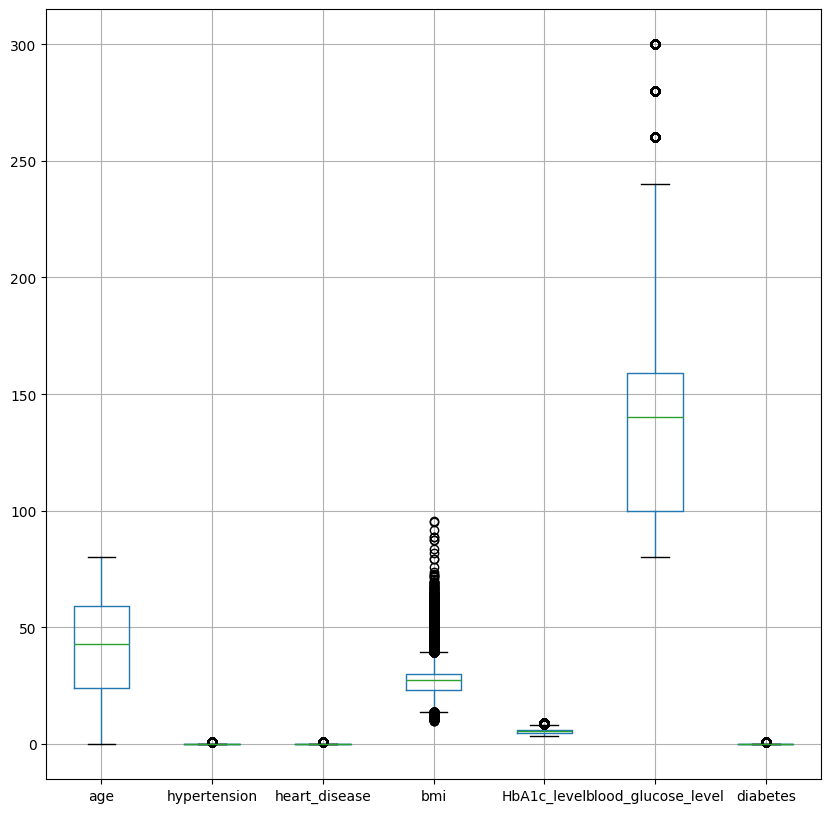

In [15]:
# Диаграммы размаха
df.boxplot(figsize=(10, 10))

<Axes: >

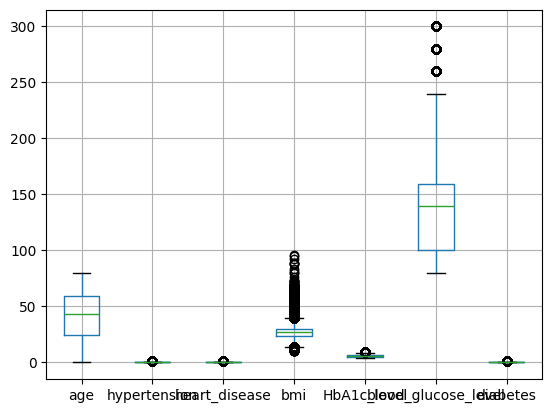

In [16]:
# Диаграммы размаха через pandas
pd.plotting.boxplot(df)

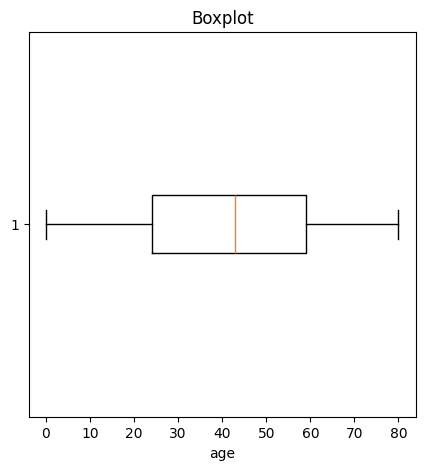

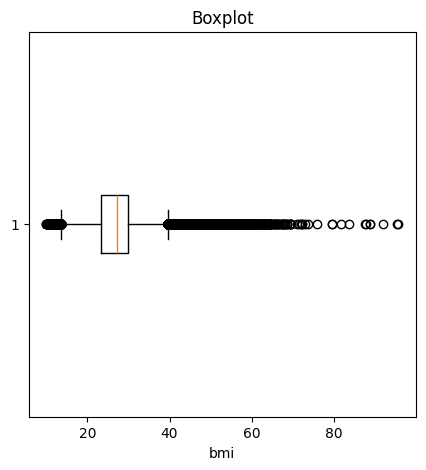

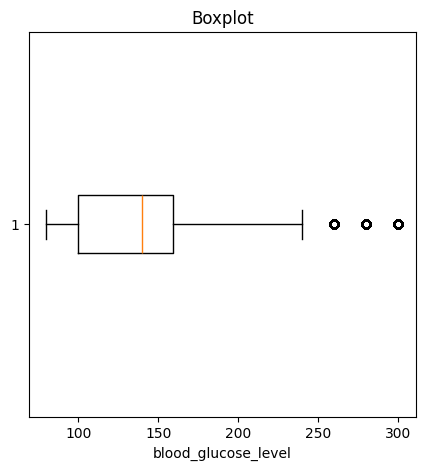

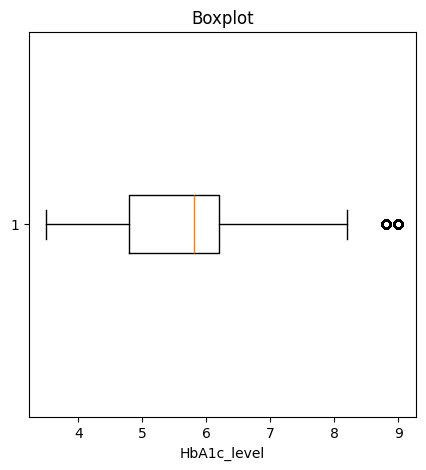

In [17]:
# Для ясности по отдельности
lst_of_numeric = ['age', 'bmi', 'blood_glucose_level', 'HbA1c_level']

for element in lst_of_numeric:
    plt.figure(figsize = (5, 5))
    plt.boxplot(df[element], vert = False)
    plt.title('Boxplot')
    plt.xlabel(element)
    plt.show()

Ящики с усами в целом подтверждают выводы выше.

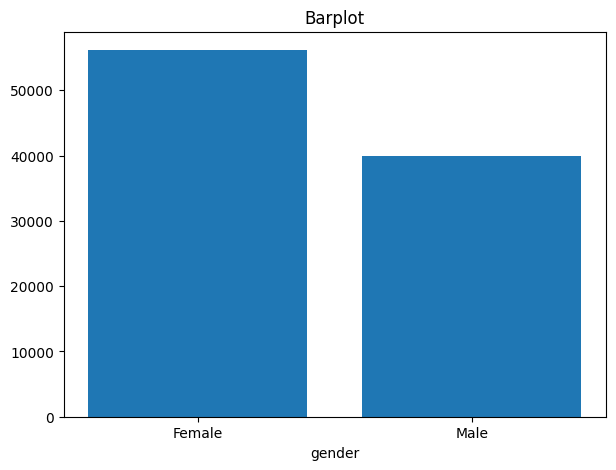

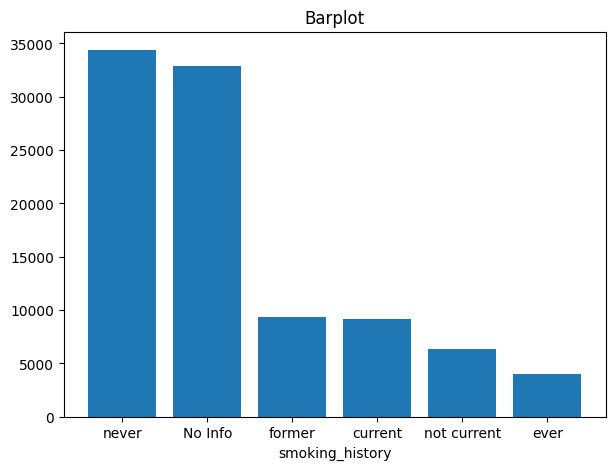

In [18]:
# Столбчатые диаграммы для категориальных переменных
object_columns = df.select_dtypes(include='object')
for column in object_columns.columns:
    plt.figure(figsize=(7, 5))
    plt.title('Barplot')
    plt.xlabel(column)
    tmp = df[column].value_counts()
    plt.bar(tmp.index, height = tmp.values)
    plt.show()


In [19]:
# phik корреляции
import phik
from phik.report import plot_correlation_matrix

interval columns not set, guessing: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


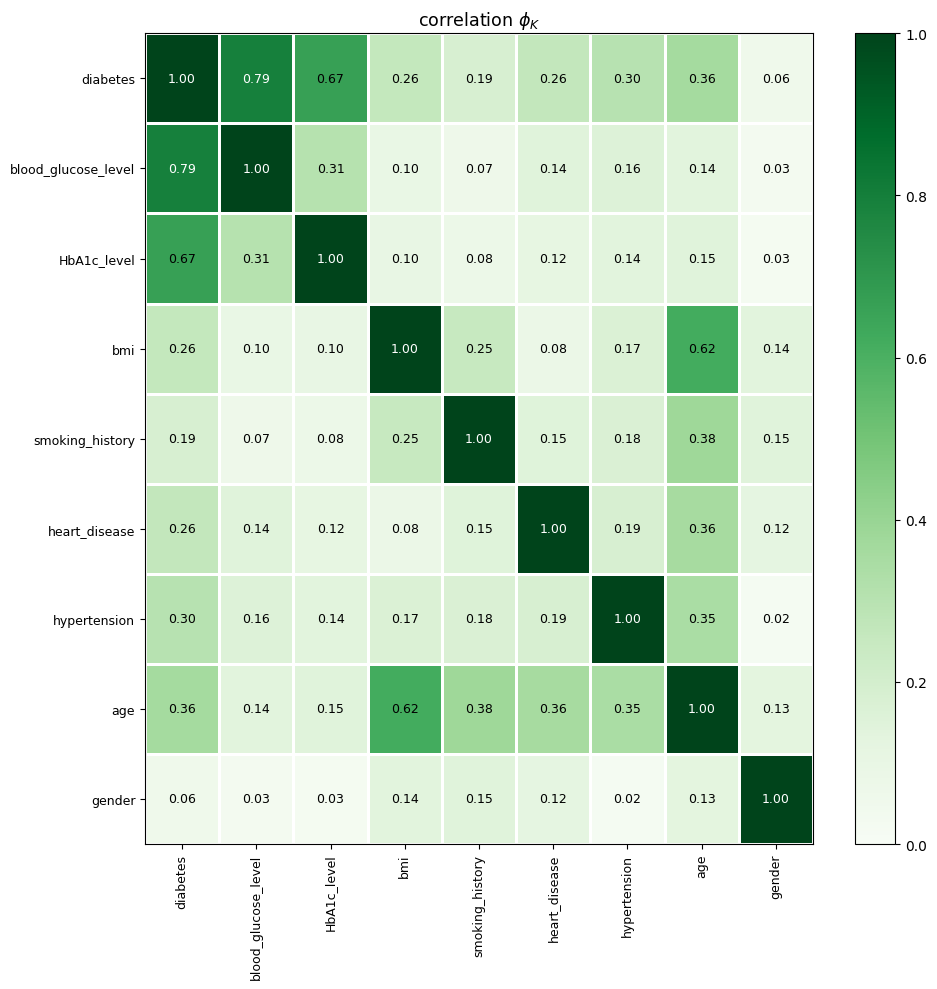

In [20]:
phik_overview = df.phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=0.9, figsize=(10, 10))
plt.tight_layout()

Для общей картины мы сначала построили матрицу phik-корреляций. Интересная информация, которую мы получаем из этой матрицы:

1. Диабет сильно коррелирует с уровнем глюкозы в крови, умеренно коррелирует с уровнем A1c гемоглобина и умеренно коррелирует с гипертонией и возрастом. Наблюдается слабая корреляция с наличием сердечных заболеваний, статусом курильщика и индексом массы тела. Корреляция с полом практически отсутствует.

2. Индекс массы тела заметно коррелирует с возрастом.

3. С возрастом умеренно коррелируют наличие гипертонии, сердечных заболеваний и историей курения.

Интересно построить корреляции двух непрерывных переменных -- массы тела и возраста.

In [21]:
from scipy import stats

In [22]:
alpha = 0.05

correlation, pvalue = stats.pearsonr(df.age, df.bmi)

print(f'Корреляция между "x", "y" равна: {correlation}, p: {pvalue}')

if pvalue < alpha:
    print('Вероятно, имеют монотонную взаимосвязь (отклоняем H0)')
else:
    print('Вероятно, у них нет монотонной взаимосвязи (подтверждается H0)')

Корреляция между "x", "y" равна: 0.3447791188397245, p: 0.0
Вероятно, имеют монотонную взаимосвязь (отклоняем H0)


Таким образом, с возрастом bmi склонен увеличиваться в данной выборке.

## Сравнение выборок

После построения всех типов графиков, необходимо провести анализ:

Отобразите на одном графике две выборки — люди с диабетом и без и сравните их.

1. Для числовых признаков — гистограммы и ящики с усами.
2. Для категориальных — столбчатые диаграммы.

После напишите вывод, есть ли какая-то зависимость?

In [23]:
# ваш код здесь
no_diabetes = df['diabetes'] == 0
yes_diabetes = df['diabetes'] == 1
df_no = df[no_diabetes]
df_yes = df[yes_diabetes]

['age', 'bmi', 'blood_glucose_level', 'HbA1c_level']


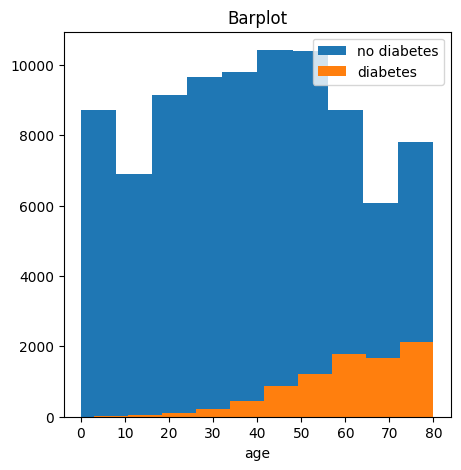

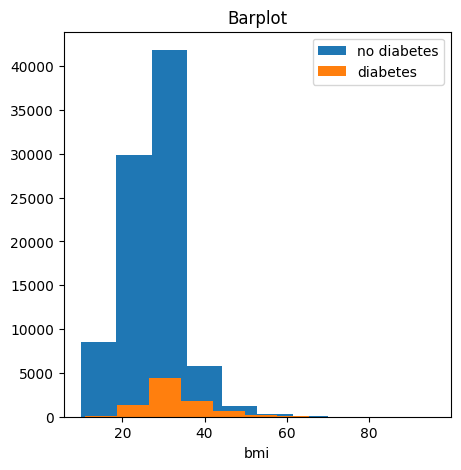

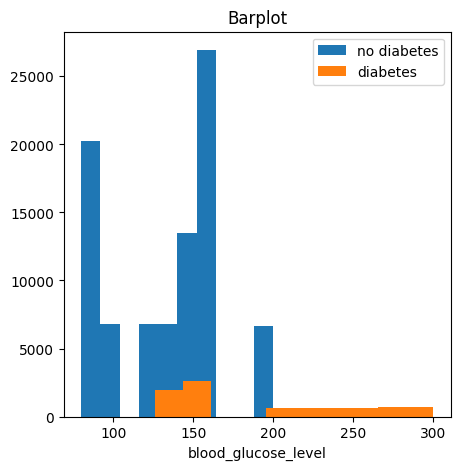

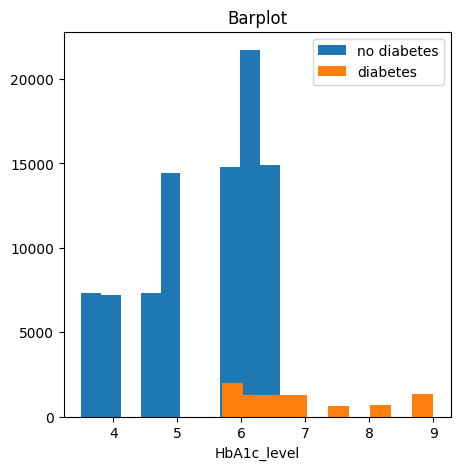

In [24]:
# гистограммы
print(lst_of_numeric)
for element in lst_of_numeric:
    plt.figure(figsize=(5, 5))
    # plt.barplot(df_no[element].value_counts().index, df_no[element].value_counts().values, label = 'no diabetes')
    # plt.barplot(df_no[element].value_counts().index, df_no[element].value_counts().values, label = 'diabetes')
    plt.hist(df_no[element], label='no diabetes')
    plt.hist(df_yes[element], label='diabetes')
    plt.title('Barplot')
    plt.xlabel(element)
    plt.legend()
    plt.show()

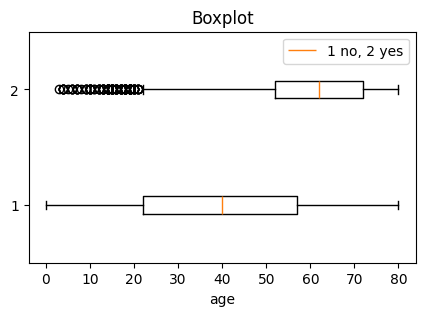

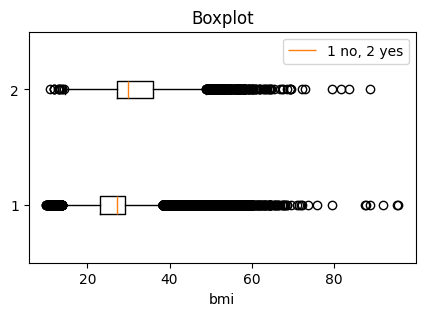

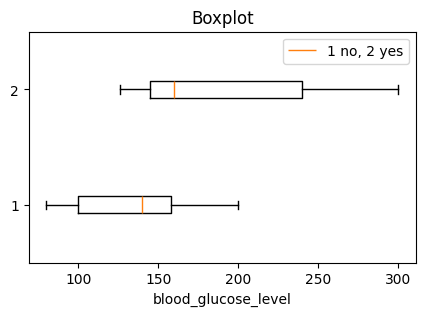

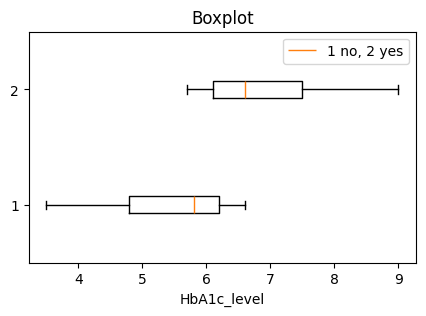

In [25]:
# ящики с усами
for element in lst_of_numeric:
    plt.figure(figsize = (5, 3))
    plt.boxplot([df_no[element], df_yes[element]], vert = False, label='1 no, 2 yes')
    # plt.boxplot(df_yes[element], vert = False, label = 'diabetes')
    plt.title('Boxplot')
    plt.xlabel(element)
    plt.legend()
    plt.show()

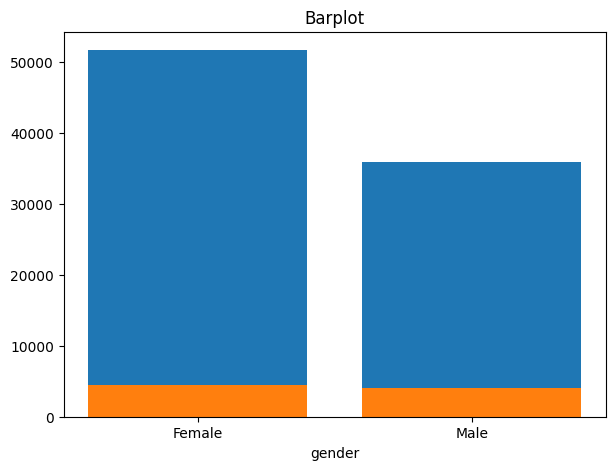

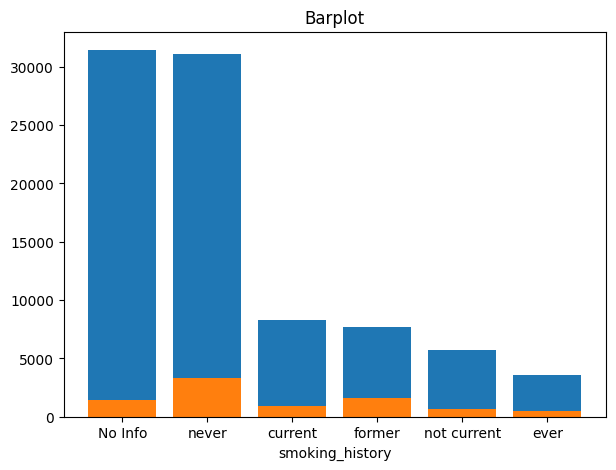

In [26]:
# столбчатые диаграммы
for column in object_columns.columns:
    plt.figure(figsize=(7, 5))
    plt.title('Barplot')
    plt.xlabel(column)
    tmp = df_no[column].value_counts()
    plt.bar(df_no[column].value_counts().index, height = df_no[column].value_counts().values, label='no diabetes')
    plt.bar(df_yes[column].value_counts().index, height = df_yes[column].value_counts().values, label='diabetes')
    plt.show()


**Вывод:**

По построенным графикам по двум выборкам можно сделать следующие выводы:

1. Отсутствие корреляции диабета с полом подтверждается.
2. Визуально подтверждается корреляция диабета с возрастом, у диабетиков существенно выше средний возраст.
3. Визуально подтверждается корреляция диабета с bmi, у диабетиков bmi в целом выше.
4. Визуально подтверждается корреляция диабета с показателями глюкозы в крови и А1с гемоглобина, у диабетиков они в среднем выше.